In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#时序案例分析
#参数初始化
discfile = r'e:\data\arima_data.xls'
forecastnum = 5

In [17]:
#读取数据，指定日期列为指标，Pnadas自动将日期列识别为Datetime格式
data = pd.read_excel(discfile, index_col='日期')
data = pd.DataFrame(data,dtype=np.float64)

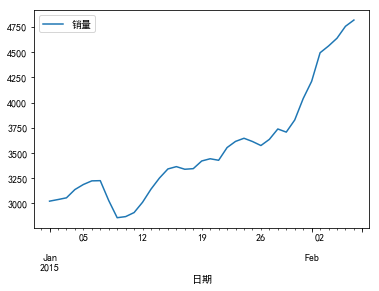

In [23]:
#时序图
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
data.plot()
plt.show()
#很明显数据跟时间是有关系的！！非平稳的数据

d:\soft\python36\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


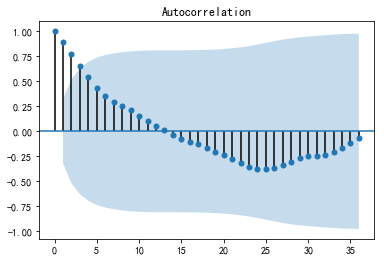

In [25]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data).show()

In [28]:
#平稳性检验
from statsmodels.tsa.stattools import adfuller as ADF
print(ADF(data['销量']))
#依次返回的是
#adf pvalue usedlag nobs critical_values icbest regresults resstore 
#我们看pvalue，pvalue很大的话说明我们不拒绝存在单位根，也就是数据不平稳

(1.8137710150945272, 0.9983759421514264, 10, 26, {'1%': -3.7112123008648155, '5%': -2.981246804733728, '10%': -2.6300945562130176}, 299.46989866024177)


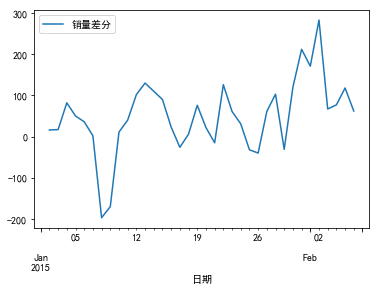

d:\soft\python36\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
d:\soft\python36\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
d:\soft\python36\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


(-3.1560562366723532,
 0.02267343544004886,
 0,
 35,
 {'1%': -3.6327426647230316,
  '5%': -2.9485102040816327,
  '10%': -2.6130173469387756},
 287.5909090780334)

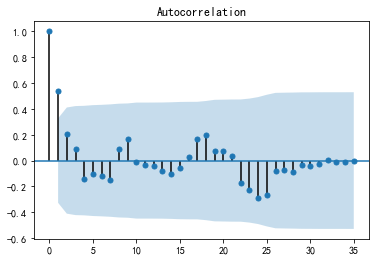

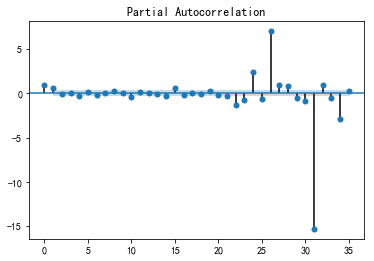

In [38]:
#差分后的结果
D_data = data.diff().dropna()
D_data.columns = ['销量差分']
D_data.plot()#时序图
plt.show()
plot_acf(D_data).show()#自相关图
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(D_data).show() #偏自相关图
ADF(D_data[u'销量差分'])#平稳性检测

In [40]:
#sh上面可以看出已经是一个平稳的时间序列了
#白噪声检验
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(D_data, lags=1) #返回统计量和p value
#p value 很少说明拒绝了存在白噪声的假设

(array([11.30402222]), array([0.00077339]))

In [44]:
#下面可以应用ARIMA模型来进行回归预测
from statsmodels.tsa.arima_model import ARIMA
pmax = int(len(D_data)/10) #一般阶数不超过length/10
qmax = int(len(D_data)/10) #一般阶数不超过length/10
bic_matrix = [] #bic矩阵
for p in range(pmax+1):
  tmp = []
  for q in range(qmax+1):
    try: #存在部分报错，所以用try来跳过报错。
      tmp.append(ARIMA(data, (p,1,q)).fit().bic)
    except:
      tmp.append(None)
  bic_matrix.append(tmp)
bic_matrix = pd.DataFrame(bic_matrix) #从中可以找出最小值
p,q = bic_matrix.stack().idxmin() #先用stack展平，然后用idxmin找出最小值位置。
print(u'BIC最小的p值和q值为：%s、%s' %(p,q)) 
model = ARIMA(data, (0,1,1)).fit() #建立ARIMA(0, 1, 1)模型
model.summary()
model.forecast(5)

d:\soft\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
d:\soft\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
d:\soft\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
d:\soft\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
d:\soft\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
d:\soft\python36\lib\site-packages\statsmodels\tsa\base

d:\soft\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
d:\soft\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
d:\soft\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
d:\soft\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
d:\soft\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
d:\soft\python36\lib\site-packages\statsmodels\tsa\base

BIC最小的p值和q值为：0、1


d:\soft\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
d:\soft\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


(array([4873.96657031, 4923.92272193, 4973.87887355, 5023.83502517,
        5073.79117679]),
 array([ 73.08574327, 142.32679131, 187.54280892, 223.80280345,
        254.95702478]),
 array([[4730.72114572, 5017.21199491],
        [4644.96733694, 5202.87810693],
        [4606.30172251, 5341.45602459],
        [4585.18959077, 5462.48045957],
        [4574.08459061, 5573.49776296]]))